In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

This script analyse this association rules find in the fifth version

In [25]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv5.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit5_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
#df2 = df.copy()
len(df)
#df.head()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Informix'}),frozenset({'Firebird'}),0.035897,0.025641,0.025641,0.714286,27.857143,0.024721,3.410256,1,1
1,frozenset({'Firebird'}),frozenset({'Informix'}),0.025641,0.035897,0.025641,1.000000,27.857143,0.024721,inf,1,1
2,frozenset({'SAP Adaptive Server'}),frozenset({'Firebird'}),0.061538,0.025641,0.025641,0.416667,16.250000,0.024063,1.670330,1,1
3,frozenset({'Firebird'}),frozenset({'SAP Adaptive Server'}),0.025641,0.061538,0.025641,1.000000,16.250000,0.024063,inf,1,1
4,frozenset({'SAP Adaptive Server'}),frozenset({'SAP SQL Anywhere'}),0.061538,0.066667,0.061538,1.000000,15.000000,0.057436,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...
247,frozenset({'IBM DB2'}),frozenset({'Redis'}),0.107692,0.194872,0.025641,0.238095,1.221805,0.004655,1.056731,1,1
248,frozenset({'Google Cloud Datastore'}),frozenset({'MySQL_Maria DB'}),0.076923,0.451282,0.041026,0.533333,1.181818,0.006312,1.175824,1,1
249,frozenset({'MySQL_Maria DB'}),frozenset({'Google Cloud Datastore'}),0.451282,0.076923,0.041026,0.090909,1.181818,0.006312,1.015385,1,1
250,frozenset({'Google Cloud Datastore'}),frozenset({'H2'}),0.076923,0.287179,0.025641,0.333333,1.160714,0.003550,1.069231,1,1


In [26]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [27]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Informix,Firebird,0.035897,0.025641,0.025641,0.714286,27.857143,0.024721,3.410256,1,1
1,Firebird,Informix,0.025641,0.035897,0.025641,1.000000,27.857143,0.024721,inf,1,1
2,SAP Adaptive Server,Firebird,0.061538,0.025641,0.025641,0.416667,16.250000,0.024063,1.670330,1,1
3,Firebird,SAP Adaptive Server,0.025641,0.061538,0.025641,1.000000,16.250000,0.024063,inf,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.061538,0.066667,0.061538,1.000000,15.000000,0.057436,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...
247,IBM DB2,Redis,0.107692,0.194872,0.025641,0.238095,1.221805,0.004655,1.056731,1,1
248,Google Cloud Datastore,MySQL_Maria DB,0.076923,0.451282,0.041026,0.533333,1.181818,0.006312,1.175824,1,1
249,MySQL_Maria DB,Google Cloud Datastore,0.451282,0.076923,0.041026,0.090909,1.181818,0.006312,1.015385,1,1
250,Google Cloud Datastore,H2,0.076923,0.287179,0.025641,0.333333,1.160714,0.003550,1.069231,1,1


In [28]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*197)
df['consequent_sup_abs'] = (df['consequent support']*197)
df['support_abs'] = (df['support']*197)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Informix,Firebird,0.035897,7.071795,0.025641,5.051282,0.025641,5.051282,0.714286,27.857143,0.024721,3.410256,1,1
1,Firebird,Informix,0.025641,5.051282,0.035897,7.071795,0.025641,5.051282,1.000000,27.857143,0.024721,inf,1,1
2,SAP Adaptive Server,Firebird,0.061538,12.123077,0.025641,5.051282,0.025641,5.051282,0.416667,16.250000,0.024063,1.670330,1,1
3,Firebird,SAP Adaptive Server,0.025641,5.051282,0.061538,12.123077,0.025641,5.051282,1.000000,16.250000,0.024063,inf,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.061538,12.123077,0.066667,13.133333,0.061538,12.123077,1.000000,15.000000,0.057436,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,IBM DB2,Redis,0.107692,21.215385,0.194872,38.389744,0.025641,5.051282,0.238095,1.221805,0.004655,1.056731,1,1
248,Google Cloud Datastore,MySQL_Maria DB,0.076923,15.153846,0.451282,88.902564,0.041026,8.082051,0.533333,1.181818,0.006312,1.175824,1,1
249,MySQL_Maria DB,Google Cloud Datastore,0.451282,88.902564,0.076923,15.153846,0.041026,8.082051,0.090909,1.181818,0.006312,1.015385,1,1
250,Google Cloud Datastore,H2,0.076923,15.153846,0.287179,56.574359,0.025641,5.051282,0.333333,1.160714,0.003550,1.069231,1,1


In [29]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Informix,Firebird,0.035897,7.071795,0.025641,5.051282,0.025641,5.051282,0.714286,27.857143,0.024721,3.410256,1,1
1,Firebird,Informix,0.025641,5.051282,0.035897,7.071795,0.025641,5.051282,1.000000,27.857143,0.024721,inf,1,1
2,SAP Adaptive Server,Firebird,0.061538,12.123077,0.025641,5.051282,0.025641,5.051282,0.416667,16.250000,0.024063,1.670330,1,1
3,Firebird,SAP Adaptive Server,0.025641,5.051282,0.061538,12.123077,0.025641,5.051282,1.000000,16.250000,0.024063,inf,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.061538,12.123077,0.066667,13.133333,0.061538,12.123077,1.000000,15.000000,0.057436,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,IBM DB2,Redis,0.107692,21.215385,0.194872,38.389744,0.025641,5.051282,0.238095,1.221805,0.004655,1.056731,1,1
248,Google Cloud Datastore,MySQL_Maria DB,0.076923,15.153846,0.451282,88.902564,0.041026,8.082051,0.533333,1.181818,0.006312,1.175824,1,1
249,MySQL_Maria DB,Google Cloud Datastore,0.451282,88.902564,0.076923,15.153846,0.041026,8.082051,0.090909,1.181818,0.006312,1.015385,1,1
250,Google Cloud Datastore,H2,0.076923,15.153846,0.287179,56.574359,0.025641,5.051282,0.333333,1.160714,0.003550,1.069231,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [30]:
rules1b = df2.sort_values(['support'], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
182,MySQL_Maria DB,PostgreSQL_ CockroachDB,0.451282,88.902564,0.271795,53.543590,0.251282,49.502564,0.556818,2.048671,0.128626,1.643130,1,1
183,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.271795,53.543590,0.451282,88.902564,0.251282,49.502564,0.924528,2.048671,0.128626,7.270513,1,1
217,MySQL_Maria DB,H2,0.451282,88.902564,0.287179,56.574359,0.215385,42.430769,0.477273,1.661932,0.085786,1.363657,1,1
216,H2,MySQL_Maria DB,0.287179,56.574359,0.451282,88.902564,0.215385,42.430769,0.750000,1.661932,0.085786,2.194872,1,1
214,HyperSQL,MySQL_Maria DB,0.256410,50.512821,0.451282,88.902564,0.194872,38.389744,0.760000,1.684091,0.079158,2.286325,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,HyperSQL,Firebird,0.256410,50.512821,0.025641,5.051282,0.025641,5.051282,0.100000,3.900000,0.019066,1.082621,1,1
73,Firebird,HyperSQL,0.025641,5.051282,0.256410,50.512821,0.025641,5.051282,1.000000,3.900000,0.019066,inf,1,1
61,Oracle,Firebird,0.230769,45.461538,0.025641,5.051282,0.025641,5.051282,0.111111,4.333333,0.019724,1.096154,1,1
60,Firebird,Oracle,0.025641,5.051282,0.230769,45.461538,0.025641,5.051282,1.000000,4.333333,0.019724,inf,1,1


In [31]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL_Maria DB,0.451282,88.902564,0.108913,21.455922,0.088889,17.511111,0.196970,1.876551,0.039738,1.137181,1.0,1.0
H2,0.287179,56.574359,0.129630,25.537037,0.075214,14.817094,0.261905,2.332367,0.037987,1.247352,1.0,1.0
PostgreSQL_ CockroachDB,0.271795,53.543590,0.117460,23.139683,0.077656,15.298168,0.285714,2.711356,0.045731,1.552165,1.0,1.0
HyperSQL,0.256410,50.512821,0.126586,24.937382,0.070175,13.824561,0.273684,2.593918,0.037718,1.279433,1.0,1.0
Oracle,0.230769,45.461538,0.140385,27.655769,0.080769,15.911538,0.350000,3.087491,0.048373,1.496394,1.0,1.0
Redis,0.194872,38.389744,0.166075,32.716765,0.060750,11.967653,0.311741,2.282662,0.028386,1.251725,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.133333,26.266667,0.153846,30.307692,0.065641,12.931282,0.492308,4.283733,0.045128,NaN,1.0,1.0
SQLite,0.128205,25.256410,0.153452,30.229980,0.050493,9.947140,0.393846,4.009400,0.030820,1.466485,1.0,1.0
IBM DB2,0.107692,21.215385,0.167258,32.949901,0.063116,12.433925,0.586081,5.180953,0.045104,4.195190,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [32]:
rules1 = df2[(df2['consequent support'] >= 0.10)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL_Maria DB,0.108913,21.455922,0.451282,88.902564,0.088889,17.511111,0.846854,1.876551,0.039738,NaN,1.0,1.0
Oracle,0.140385,27.655769,0.230769,45.461538,0.080769,15.911538,0.712498,3.087491,0.048373,NaN,1.0,1.0
PostgreSQL_ CockroachDB,0.117460,23.139683,0.271795,53.543590,0.077656,15.298168,0.736933,2.711356,0.045731,NaN,1.0,1.0
H2,0.129630,25.537037,0.287179,56.574359,0.075214,14.817094,0.669808,2.332367,0.037987,NaN,1.0,1.0
HyperSQL,0.126586,24.937382,0.256410,50.512821,0.070175,13.824561,0.665107,2.593918,0.037718,NaN,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.153846,30.307692,0.133333,26.266667,0.065641,12.931282,0.571164,4.283733,0.045128,NaN,1.0,1.0
IBM DB2,0.167258,32.949901,0.107692,21.215385,0.063116,12.433925,0.557949,5.180953,0.045104,NaN,1.0,1.0
Redis,0.166075,32.716765,0.194872,38.389744,0.060750,11.967653,0.444826,2.282662,0.028386,1.711833,1.0,1.0
SQLite,0.153452,30.229980,0.128205,25.256410,0.050493,9.947140,0.514026,4.009400,0.030820,NaN,1.0,1.0


In [33]:
rules1c = df2.groupby(['antecedents','consequents']).sum().sort_values(['support'], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  \
antecedents             consequents                                                      
PostgreSQL_ CockroachDB MySQL_Maria DB                                        0.271795   
MySQL_Maria DB          PostgreSQL_ CockroachDB                               0.451282   
H2                      MySQL_Maria DB                                        0.287179   
MySQL_Maria DB          H2                                                    0.451282   
HyperSQL                MySQL_Maria DB                                        0.256410   
...                                                                                ...   
Hazelcast               PostgreSQL_ CockroachDB                               0.041026   
HBase                   SAP SQL Anywhere                                      0.061538   
                        MS SQL Server_Microsoft Azure SQL Database            0.061538   
SAP Adaptive Server     SapHana                                               0.061538   
Cassandra               H2                                                    0.066667   

                                                                    antecedent_sup_abs  \
antecedents             consequents                                                      
PostgreSQL_ CockroachDB MySQL_Maria DB                                       53.543590   
MySQL_Maria DB          PostgreSQL_ CockroachDB                              88.902564   
H2                      MySQL_Maria DB                                       56.574359   
MySQL_Maria DB          H2                                                   88.902564   
HyperSQL                MySQL_Maria DB                                       50.512821   
...                                                                                ...   
Hazelcast               PostgreSQL_ CockroachDB                               8.082051   
HBase                   SAP SQL Anywhere                                     12.123077   
                        MS SQL Server_Microsoft Azure SQL Database           12.123077   
SAP Adaptive Server     SapHana                                              12.123077   
Cassandra               H2                                                   13.133333   

                                                                    consequent support  \
antecedents             consequents                                                      
PostgreSQL_ CockroachDB MySQL_Maria DB                                        0.451282   
MySQL_Maria DB          PostgreSQL_ CockroachDB                               0.271795   
H2                      MySQL_Maria DB                                        0.451282   
MySQL_Maria DB          H2                                                    0.287179   
HyperSQL                MySQL_Maria DB                                        0.451282   
...                                                                                ...   
Hazelcast               PostgreSQL_ CockroachDB                               0.271795   
HBase                   SAP SQL Anywhere                                      0.066667   
                        MS SQL Server_Microsoft Azure SQL Database            0.133333   
SAP Adaptive Server     SapHana                                               0.030769   
Cassandra               H2                                                    0.287179   

                                                                    consequent_sup_abs  \
antecedents             consequents                                                      
PostgreSQL_ CockroachDB MySQL_Maria DB                                       88.902564   
MySQL_Maria DB          PostgreSQL_ CockroachDB                              53.543590   
H2                      MySQL_Maria DB                                       88.902564   
MySQL_Maria DB          H2                                                   56.574359   
HyperSQL       

In [34]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv5.xlsx', index=False)

In [35]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

,,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,consequents,,,,,,,,,,,,
PostgreSQL_ CockroachDB,MySQL_Maria DB,0.271795,53.543590,0.451282,88.902564,0.251282,49.502564,0.924528,2.048671,0.128626,7.270513,1,1
H2,MySQL_Maria DB,0.287179,56.574359,0.451282,88.902564,0.215385,42.430769,0.750000,1.661932,0.085786,2.194872,1,1
HyperSQL,MySQL_Maria DB,0.256410,50.512821,0.451282,88.902564,0.194872,38.389744,0.760000,1.684091,0.079158,2.286325,1,1
Oracle,MySQL_Maria DB,0.230769,45.461538,0.451282,88.902564,0.189744,37.379487,0.822222,1.821970,0.085602,3.086538,1,1
PostgreSQL_ CockroachDB,Oracle,0.271795,53.543590,0.230769,45.461538,0.164103,32.328205,0.603774,2.616352,0.101381,1.941392,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MongoDB,MS SQL Server_Microsoft Azure SQL Database,0.097436,19.194872,0.133333,26.266667,0.025641,5.051282,0.263158,1.973684,0.012650,1.176190,1,1
PostgreSQL_ CockroachDB,Hazelcast,0.271795,53.543590,0.041026,8.082051,0.025641,5.051282,0.094340,2.299528,0.014490,1.058868,1,1
MS SQL Server_Microsoft Azure SQL Database,HBase,0.133333,26.266667,0.061538,12.123077,0.025641,5.051282,0.192308,3.125000,0.017436,1.161905,1,1


In [36]:
rules1c

,,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,consequents,,,,,,,,,,,,
PostgreSQL_ CockroachDB,MySQL_Maria DB,0.271795,53.543590,0.451282,88.902564,0.251282,49.502564,0.924528,2.048671,0.128626,7.270513,1,1
H2,MySQL_Maria DB,0.287179,56.574359,0.451282,88.902564,0.215385,42.430769,0.750000,1.661932,0.085786,2.194872,1,1
HyperSQL,MySQL_Maria DB,0.256410,50.512821,0.451282,88.902564,0.194872,38.389744,0.760000,1.684091,0.079158,2.286325,1,1
Oracle,MySQL_Maria DB,0.230769,45.461538,0.451282,88.902564,0.189744,37.379487,0.822222,1.821970,0.085602,3.086538,1,1
PostgreSQL_ CockroachDB,Oracle,0.271795,53.543590,0.230769,45.461538,0.164103,32.328205,0.603774,2.616352,0.101381,1.941392,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MongoDB,MS SQL Server_Microsoft Azure SQL Database,0.097436,19.194872,0.133333,26.266667,0.025641,5.051282,0.263158,1.973684,0.012650,1.176190,1,1
PostgreSQL_ CockroachDB,Hazelcast,0.271795,53.543590,0.041026,8.082051,0.025641,5.051282,0.094340,2.299528,0.014490,1.058868,1,1
MS SQL Server_Microsoft Azure SQL Database,HBase,0.133333,26.266667,0.061538,12.123077,0.025641,5.051282,0.192308,3.125000,0.017436,1.161905,1,1


In [37]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.271795,53.543590,0.451282,88.902564,0.251282,49.502564,0.924528,2.048671,0.128626,7.270513,1,1
1,H2,MySQL_Maria DB,0.287179,56.574359,0.451282,88.902564,0.215385,42.430769,0.750000,1.661932,0.085786,2.194872,1,1
2,HyperSQL,MySQL_Maria DB,0.256410,50.512821,0.451282,88.902564,0.194872,38.389744,0.760000,1.684091,0.079158,2.286325,1,1
3,Oracle,MySQL_Maria DB,0.230769,45.461538,0.451282,88.902564,0.189744,37.379487,0.822222,1.821970,0.085602,3.086538,1,1
4,PostgreSQL_ CockroachDB,Oracle,0.271795,53.543590,0.230769,45.461538,0.164103,32.328205,0.603774,2.616352,0.101381,1.941392,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,MongoDB,MS SQL Server_Microsoft Azure SQL Database,0.097436,19.194872,0.133333,26.266667,0.025641,5.051282,0.263158,1.973684,0.012650,1.176190,1,1
122,PostgreSQL_ CockroachDB,Hazelcast,0.271795,53.543590,0.041026,8.082051,0.025641,5.051282,0.094340,2.299528,0.014490,1.058868,1,1
123,MS SQL Server_Microsoft Azure SQL Database,HBase,0.133333,26.266667,0.061538,12.123077,0.025641,5.051282,0.192308,3.125000,0.017436,1.161905,1,1
124,Informix,SAP Adaptive Server,0.035897,7.071795,0.061538,12.123077,0.025641,5.051282,0.714286,11.607143,0.023432,3.284615,1,1


This chart shows all the rules for the BDs used together in fifth version.

In [38]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width=1000, height =1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [39]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
#order


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
5,PostgreSQL_ CockroachDB,H2,0.271795,53.543590,0.287179,56.574359,0.164103,32,0.603774,2.102426,0.086049,1.799023,1,1
4,PostgreSQL_ CockroachDB,Oracle,0.271795,53.543590,0.230769,45.461538,0.164103,32,0.603774,2.616352,0.101381,1.941392,1,1
0,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.271795,53.543590,0.451282,88.902564,0.251282,49,0.924528,2.048671,0.128626,7.270513,1,1
11,PostgreSQL_ CockroachDB,MS SQL Server_Microsoft Azure SQL Database,0.271795,53.543590,0.133333,26.266667,0.128205,25,0.471698,3.537736,0.091966,1.640476,1,1
17,PostgreSQL_ CockroachDB,Redis,0.271795,53.543590,0.194872,38.389744,0.102564,20,0.377358,1.936445,0.049599,1.293085,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Firebird,SAP SQL Anywhere,0.025641,5.051282,0.066667,13.133333,0.025641,5,1.000000,15.000000,0.023932,inf,1,1
100,Firebird,SAP Adaptive Server,0.025641,5.051282,0.061538,12.123077,0.025641,5,1.000000,16.250000,0.024063,inf,1,1
109,Firebird,Informix,0.025641,5.051282,0.035897,7.071795,0.025641,5,1.000000,27.857143,0.024721,inf,1,1
108,ClickHouse,PostgreSQL_ CockroachDB,0.025641,5.051282,0.271795,53.543590,0.025641,5,1.000000,3.679245,0.018672,inf,1,1


In [40]:
#if you need to generate the rules in excel
#rules_filter = orules1c.to_excel('rules_filtersv5_order.xlsx', index=False)

In [41]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd = orules1cd.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.271795,53.543590,0.451282,88.902564,0.251282,49,0.924528,2.048671,0.128626,7.270513,1,1
1,H2,MySQL_Maria DB,0.287179,56.574359,0.451282,88.902564,0.215385,42,0.750000,1.661932,0.085786,2.194872,1,1
2,HyperSQL,MySQL_Maria DB,0.256410,50.512821,0.451282,88.902564,0.194872,38,0.760000,1.684091,0.079158,2.286325,1,1
3,Oracle,MySQL_Maria DB,0.230769,45.461538,0.451282,88.902564,0.189744,37,0.822222,1.821970,0.085602,3.086538,1,1
4,PostgreSQL_ CockroachDB,Oracle,0.271795,53.543590,0.230769,45.461538,0.164103,32,0.603774,2.616352,0.101381,1.941392,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Cassandra,HyperSQL,0.066667,13.133333,0.256410,50.512821,0.025641,5,0.384615,1.500000,0.008547,1.208333,1,1
118,SQLite,MS Access,0.128205,25.256410,0.035897,7.071795,0.025641,5,0.200000,5.571429,0.021039,1.205128,1,1
110,SQLite,Firebird,0.128205,25.256410,0.025641,5.051282,0.025641,5,0.200000,7.800000,0.022354,1.217949,1,1
119,DynamoDB,MongoDB,0.051282,10.102564,0.097436,19.194872,0.025641,5,0.500000,5.131579,0.020644,1.805128,1,1


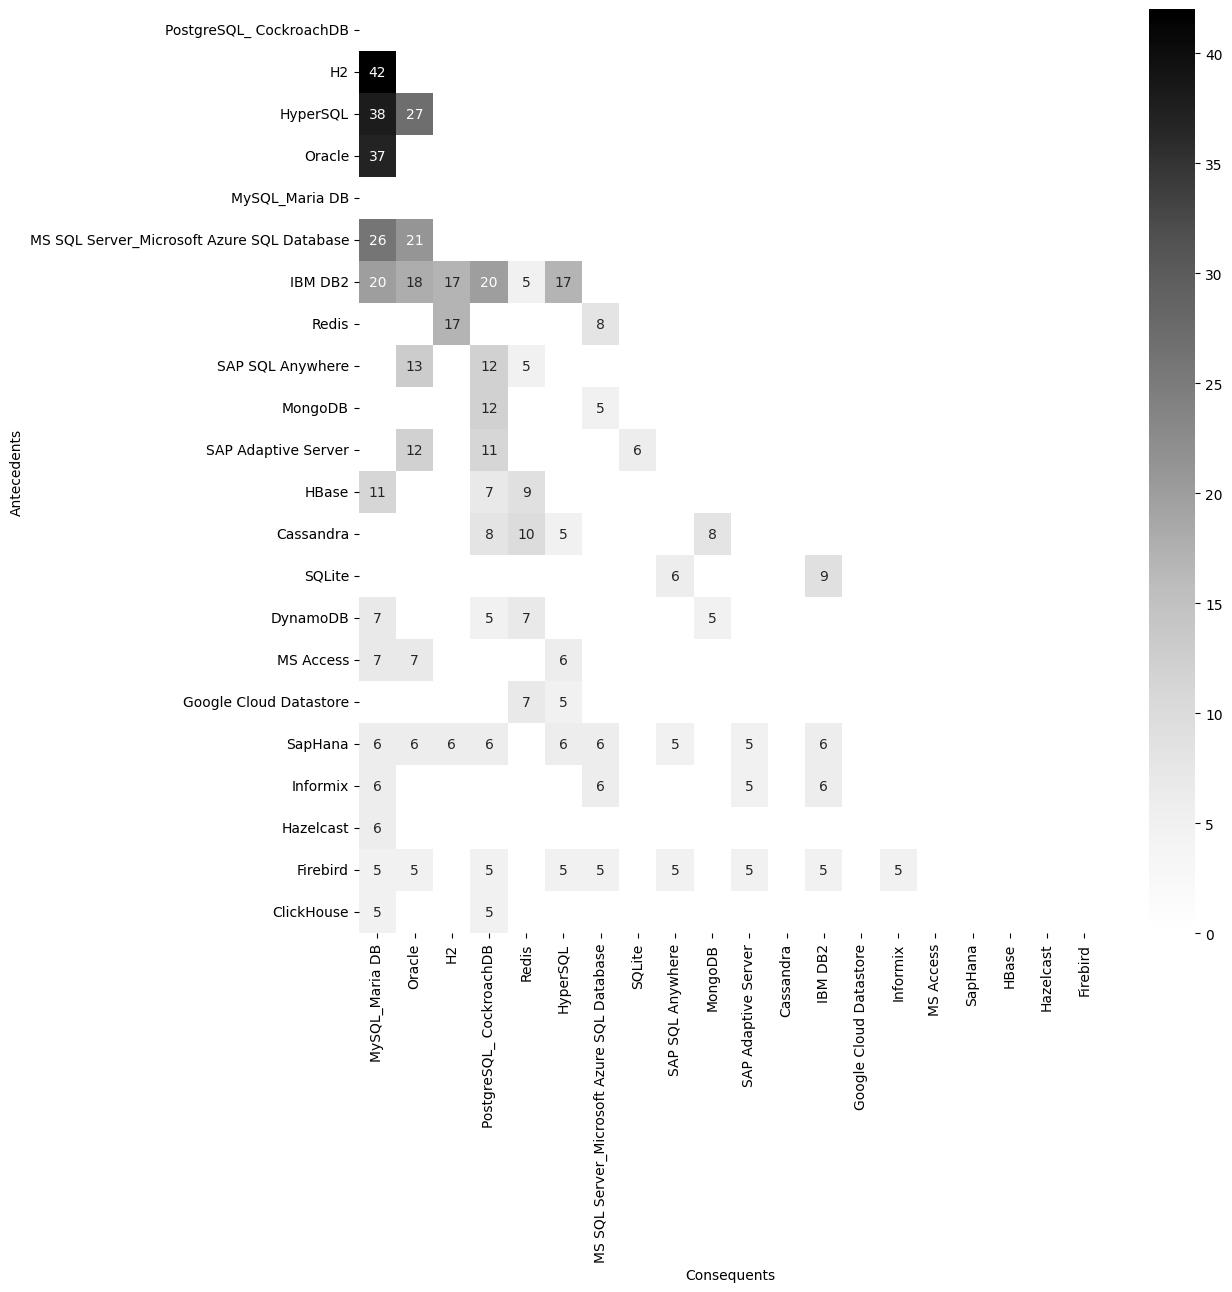

In [42]:
#Heatmap graph generated with all rules and ordering
#Suggestion for this chart would be to show all the rules without filtering by support
import seaborn as sns
pivot = orules1cd.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True),
            mask=np.triu(np.ones_like(pivot)))
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig13.pdf", format="pdf", bbox_inches="tight")

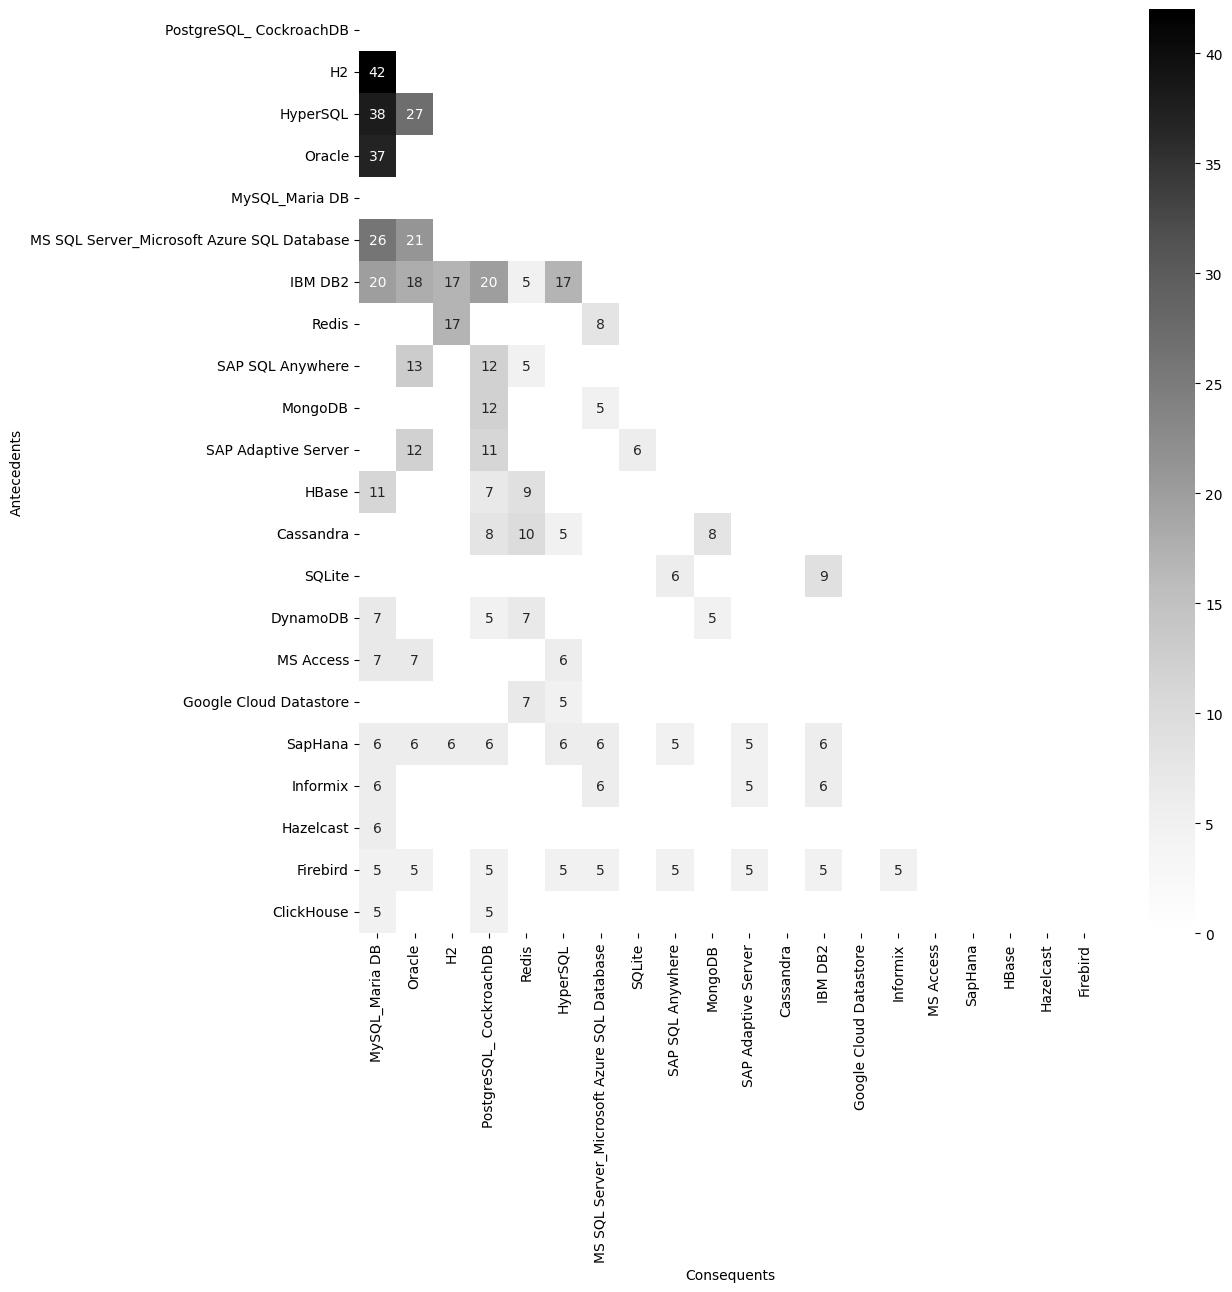

In [43]:
#Generating a heatmap without repetitions, with function ordering, following the tip:
# generate the complete heatmap with the y axis inverted and
# use the parameter mask=np.triu(np.ones_like(df)) in sns.heatmap
import seaborn as sns
pivot = orules1cd.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True),
    mask=np.triu(np.ones_like(pivot)))
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig13.pdf", format="pdf", bbox_inches="tight")

import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 

#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs','antecedent_sup_abs'], ascending=[False, False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"]) 
#fig.title('Correlation of the most frequent databases')
fig.show()


In [44]:
#Test to understand how the pivot function transforms the dataframe
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
pivot.columns
#Invertendo a posição dos BDs
pivot = pivot.iloc[::-1]
pivot = pivot.reset_index()
pivot

consequents,antecedents,H2,Oracle,MySQL_Maria DB,MS SQL Server_Microsoft Azure SQL Database,Redis,SQLite,MS Access,Google Cloud Datastore,Informix,...,HyperSQL,SAP SQL Anywhere,MongoDB,SAP Adaptive Server,HBase,Cassandra,Firebird,PostgreSQL_ CockroachDB,IBM DB2,SapHana
0,ClickHouse,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,Firebird,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,5.0,...,5.0,5.0,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN
2,Hazelcast,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Informix,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,6.0,NaN
4,SapHana,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,NaN,5.0,NaN,NaN,NaN,6.0,6.0,NaN
5,Google Cloud Datastore,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MS Access,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,DynamoDB,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
8,SQLite,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,...,NaN,6.0,NaN,NaN,NaN,NaN,5.0,NaN,9.0,6.0
9,Cassandra,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,5.0,NaN,8.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN


In [45]:
#Test generating the graph with all the rules ordered with the function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1cd['support_abs'] = orules1cd['support_abs'].astype(int)

fig = px.scatter(orules1cd, x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [47]:
#Test showing the rules without inverted repetitions and with dataframe ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [48]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support'], ascending=[False])
rules1c

antecedent support  \
antecedents             consequents                                                      
PostgreSQL_ CockroachDB MySQL_Maria DB                                        0.271795   
MySQL_Maria DB          PostgreSQL_ CockroachDB                               0.451282   
H2                      MySQL_Maria DB                                        0.287179   
MySQL_Maria DB          H2                                                    0.451282   
HyperSQL                MySQL_Maria DB                                        0.256410   
...                                                                                ...   
Hazelcast               PostgreSQL_ CockroachDB                               0.041026   
HBase                   SAP SQL Anywhere                                      0.061538   
                        MS SQL Server_Microsoft Azure SQL Database            0.061538   
SAP Adaptive Server     SapHana                                               0.061538   
Cassandra               H2                                                    0.066667   

                                                                    antecedent_sup_abs  \
antecedents             consequents                                                      
PostgreSQL_ CockroachDB MySQL_Maria DB                                       53.543590   
MySQL_Maria DB          PostgreSQL_ CockroachDB                              88.902564   
H2                      MySQL_Maria DB                                       56.574359   
MySQL_Maria DB          H2                                                   88.902564   
HyperSQL                MySQL_Maria DB                                       50.512821   
...                                                                                ...   
Hazelcast               PostgreSQL_ CockroachDB                               8.082051   
HBase                   SAP SQL Anywhere                                     12.123077   
                        MS SQL Server_Microsoft Azure SQL Database           12.123077   
SAP Adaptive Server     SapHana                                              12.123077   
Cassandra               H2                                                   13.133333   

                                                                    consequent support  \
antecedents             consequents                                                      
PostgreSQL_ CockroachDB MySQL_Maria DB                                        0.451282   
MySQL_Maria DB          PostgreSQL_ CockroachDB                               0.271795   
H2                      MySQL_Maria DB                                        0.451282   
MySQL_Maria DB          H2                                                    0.287179   
HyperSQL                MySQL_Maria DB                                        0.451282   
...                                                                                ...   
Hazelcast               PostgreSQL_ CockroachDB                               0.271795   
HBase                   SAP SQL Anywhere                                      0.066667   
                        MS SQL Server_Microsoft Azure SQL Database            0.133333   
SAP Adaptive Server     SapHana                                               0.030769   
Cassandra               H2                                                    0.287179   

                                                                    consequent_sup_abs  \
antecedents             consequents                                                      
PostgreSQL_ CockroachDB MySQL_Maria DB                                       88.902564   
MySQL_Maria DB          PostgreSQL_ CockroachDB                              53.543590   
H2                      MySQL_Maria DB                                       88.902564   
MySQL_Maria DB          H2                                                   56.574359   
HyperSQL       

In [49]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL_Maria DB,0.108913,21.455922,0.451282,88.902564,0.088889,17.511111,0.846854,1.876551,0.039738,NaN,1.0,1.0
Oracle,0.140385,27.655769,0.230769,45.461538,0.080769,15.911538,0.712498,3.087491,0.048373,NaN,1.0,1.0
PostgreSQL_ CockroachDB,0.117460,23.139683,0.271795,53.543590,0.077656,15.298168,0.736933,2.711356,0.045731,NaN,1.0,1.0
H2,0.129630,25.537037,0.287179,56.574359,0.075214,14.817094,0.669808,2.332367,0.037987,NaN,1.0,1.0
HyperSQL,0.126586,24.937382,0.256410,50.512821,0.070175,13.824561,0.665107,2.593918,0.037718,NaN,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.153846,30.307692,0.133333,26.266667,0.065641,12.931282,0.571164,4.283733,0.045128,NaN,1.0,1.0
IBM DB2,0.167258,32.949901,0.107692,21.215385,0.063116,12.433925,0.557949,5.180953,0.045104,NaN,1.0,1.0
Redis,0.166075,32.716765,0.194872,38.389744,0.060750,11.967653,0.444826,2.282662,0.028386,1.711833,1.0,1.0
SQLite,0.153452,30.229980,0.128205,25.256410,0.050493,9.947140,0.514026,4.009400,0.030820,NaN,1.0,1.0


In [50]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL_Maria DB,0.451282,88.902564,0.108913,21.455922,0.088889,17.511111,0.196970,1.876551,0.039738,1.137181,1.0,1.0
Oracle,0.230769,45.461538,0.140385,27.655769,0.080769,15.911538,0.350000,3.087491,0.048373,1.496394,1.0,1.0
PostgreSQL_ CockroachDB,0.271795,53.543590,0.117460,23.139683,0.077656,15.298168,0.285714,2.711356,0.045731,1.552165,1.0,1.0
H2,0.287179,56.574359,0.129630,25.537037,0.075214,14.817094,0.261905,2.332367,0.037987,1.247352,1.0,1.0
HyperSQL,0.256410,50.512821,0.126586,24.937382,0.070175,13.824561,0.273684,2.593918,0.037718,1.279433,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.133333,26.266667,0.153846,30.307692,0.065641,12.931282,0.492308,4.283733,0.045128,NaN,1.0,1.0
IBM DB2,0.107692,21.215385,0.167258,32.949901,0.063116,12.433925,0.586081,5.180953,0.045104,4.195190,1.0,1.0
Redis,0.194872,38.389744,0.166075,32.716765,0.060750,11.967653,0.311741,2.282662,0.028386,1.251725,1.0,1.0
SQLite,0.128205,25.256410,0.153452,30.229980,0.050493,9.947140,0.393846,4.009400,0.030820,1.466485,1.0,1.0


In [51]:
rules1cb = rules1ca[(rules1ca['support'] >= 0.043)]  
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL_Maria DB,0.451282,88.902564,0.108913,21.455922,0.088889,17.511111,0.196970,1.876551,0.039738,1.137181,1.0,1.0
Oracle,0.230769,45.461538,0.140385,27.655769,0.080769,15.911538,0.350000,3.087491,0.048373,1.496394,1.0,1.0
PostgreSQL_ CockroachDB,0.271795,53.543590,0.117460,23.139683,0.077656,15.298168,0.285714,2.711356,0.045731,1.552165,1.0,1.0
H2,0.287179,56.574359,0.129630,25.537037,0.075214,14.817094,0.261905,2.332367,0.037987,1.247352,1.0,1.0
HyperSQL,0.256410,50.512821,0.126586,24.937382,0.070175,13.824561,0.273684,2.593918,0.037718,1.279433,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.133333,26.266667,0.153846,30.307692,0.065641,12.931282,0.492308,4.283733,0.045128,NaN,1.0,1.0
IBM DB2,0.107692,21.215385,0.167258,32.949901,0.063116,12.433925,0.586081,5.180953,0.045104,4.195190,1.0,1.0
Redis,0.194872,38.389744,0.166075,32.716765,0.060750,11.967653,0.311741,2.282662,0.028386,1.251725,1.0,1.0
SQLite,0.128205,25.256410,0.153452,30.229980,0.050493,9.947140,0.393846,4.009400,0.030820,1.466485,1.0,1.0


In [52]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
160,MS Access,MySQL_Maria DB,0.035897,7.071795,0.451282,88.902564,0.035897,7.071795,1.000000,2.215909,0.019698,inf,1,1
161,SAP Adaptive Server,MySQL_Maria DB,0.061538,12.123077,0.451282,88.902564,0.061538,12.123077,1.000000,2.215909,0.033767,inf,1,1
162,ClickHouse,MySQL_Maria DB,0.025641,5.051282,0.451282,88.902564,0.025641,5.051282,1.000000,2.215909,0.014070,inf,1,1
165,SAP SQL Anywhere,MySQL_Maria DB,0.066667,13.133333,0.451282,88.902564,0.066667,13.133333,1.000000,2.215909,0.036581,inf,1,1
166,SapHana,MySQL_Maria DB,0.030769,6.061538,0.451282,88.902564,0.030769,6.061538,1.000000,2.215909,0.016884,inf,1,1
168,Firebird,MySQL_Maria DB,0.025641,5.051282,0.451282,88.902564,0.025641,5.051282,1.000000,2.215909,0.014070,inf,1,1
169,MS SQL Server_Microsoft Azure SQL Database,MySQL_Maria DB,0.133333,26.266667,0.451282,88.902564,0.133333,26.266667,1.000000,2.215909,0.073162,inf,1,1
179,IBM DB2,MySQL_Maria DB,0.107692,21.215385,0.451282,88.902564,0.102564,20.205128,0.952381,2.110390,0.053964,11.523077,1,1
183,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.271795,53.543590,0.451282,88.902564,0.251282,49.502564,0.924528,2.048671,0.128626,7.270513,1,1
185,HBase,MySQL_Maria DB,0.061538,12.123077,0.451282,88.902564,0.056410,11.112821,0.916667,2.031250,0.028639,6.584615,1,1


In [53]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL'))) & (df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
85,SapHana,PostgreSQL_ CockroachDB,0.030769,6.061538,0.271795,53.543590,0.030769,6.061538,1.000000,3.679245,0.022406,inf,1,1
87,ClickHouse,PostgreSQL_ CockroachDB,0.025641,5.051282,0.271795,53.543590,0.025641,5.051282,1.000000,3.679245,0.018672,inf,1,1
89,Firebird,PostgreSQL_ CockroachDB,0.025641,5.051282,0.271795,53.543590,0.025641,5.051282,1.000000,3.679245,0.018672,inf,1,1
94,MS SQL Server_Microsoft Azure SQL Database,PostgreSQL_ CockroachDB,0.133333,26.266667,0.271795,53.543590,0.128205,25.256410,0.961538,3.537736,0.091966,18.933333,1,1
97,IBM DB2,PostgreSQL_ CockroachDB,0.107692,21.215385,0.271795,53.543590,0.102564,20.205128,0.952381,3.504043,0.073294,15.292308,1,1
106,SAP SQL Anywhere,PostgreSQL_ CockroachDB,0.066667,13.133333,0.271795,53.543590,0.061538,12.123077,0.923077,3.396226,0.043419,9.466667,1,1
108,SAP Adaptive Server,PostgreSQL_ CockroachDB,0.061538,12.123077,0.271795,53.543590,0.056410,11.112821,0.916667,3.372642,0.039684,8.738462,1,1
120,MS Access,PostgreSQL_ CockroachDB,0.035897,7.071795,0.271795,53.543590,0.030769,6.061538,0.857143,3.153639,0.021012,5.097436,1,1
121,Informix,PostgreSQL_ CockroachDB,0.035897,7.071795,0.271795,53.543590,0.030769,6.061538,0.857143,3.153639,0.021012,5.097436,1,1
139,Oracle,PostgreSQL_ CockroachDB,0.230769,45.461538,0.271795,53.543590,0.164103,32.328205,0.711111,2.616352,0.101381,2.520710,1,1


In [54]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
100,Informix,H2,0.035897,7.071795,0.287179,56.574359,0.035897,7.071795,1.000000,3.482143,0.025588,inf,1,1
101,Firebird,H2,0.025641,5.051282,0.287179,56.574359,0.025641,5.051282,1.000000,3.482143,0.018277,inf,1,1
105,SapHana,H2,0.030769,6.061538,0.287179,56.574359,0.030769,6.061538,1.000000,3.482143,0.021933,inf,1,1
115,SAP Adaptive Server,H2,0.061538,12.123077,0.287179,56.574359,0.056410,11.112821,0.916667,3.191964,0.038738,8.553846,1,1
126,MS Access,H2,0.035897,7.071795,0.287179,56.574359,0.030769,6.061538,0.857143,2.984694,0.020460,4.989744,1,1
130,SAP SQL Anywhere,H2,0.066667,13.133333,0.287179,56.574359,0.056410,11.112821,0.846154,2.946429,0.037265,4.633333,1,1
135,IBM DB2,H2,0.107692,21.215385,0.287179,56.574359,0.087179,17.174359,0.809524,2.818878,0.056252,3.742308,1,1
137,MS SQL Server_Microsoft Azure SQL Database,H2,0.133333,26.266667,0.287179,56.574359,0.102564,20.205128,0.769231,2.678571,0.064274,3.088889,1,1


In [55]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
55,SAP SQL Anywhere,Oracle,0.066667,13.133333,0.230769,45.461538,0.066667,13.133333,1.000000,4.333333,0.051282,inf,1,1
56,SAP Adaptive Server,Oracle,0.061538,12.123077,0.230769,45.461538,0.061538,12.123077,1.000000,4.333333,0.047337,inf,1,1
58,MS Access,Oracle,0.035897,7.071795,0.230769,45.461538,0.035897,7.071795,1.000000,4.333333,0.027613,inf,1,1
60,Firebird,Oracle,0.025641,5.051282,0.230769,45.461538,0.025641,5.051282,1.000000,4.333333,0.019724,inf,1,1
63,SapHana,Oracle,0.030769,6.061538,0.230769,45.461538,0.030769,6.061538,1.000000,4.333333,0.023669,inf,1,1
82,Informix,Oracle,0.035897,7.071795,0.230769,45.461538,0.030769,6.061538,0.857143,3.714286,0.022485,5.384615,1,1
83,IBM DB2,Oracle,0.107692,21.215385,0.230769,45.461538,0.092308,18.184615,0.857143,3.714286,0.067456,5.384615,1,1
98,MS SQL Server_Microsoft Azure SQL Database,Oracle,0.133333,26.266667,0.230769,45.461538,0.107692,21.215385,0.807692,3.500000,0.076923,4.000000,1,1


In [56]:
#rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules6

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
28,SapHana,MS SQL Server_Microsoft Azure SQL Database,0.030769,6.061538,0.133333,26.266667,0.030769,6.061538,1.000000,7.500000,0.026667,inf,1,1
30,Firebird,MS SQL Server_Microsoft Azure SQL Database,0.025641,5.051282,0.133333,26.266667,0.025641,5.051282,1.000000,7.500000,0.022222,inf,1,1
37,Informix,MS SQL Server_Microsoft Azure SQL Database,0.035897,7.071795,0.133333,26.266667,0.030769,6.061538,0.857143,6.428571,0.025983,6.066667,1,1
39,SAP SQL Anywhere,MS SQL Server_Microsoft Azure SQL Database,0.066667,13.133333,0.133333,26.266667,0.056410,11.112821,0.846154,6.346154,0.047521,5.633333,1,1
47,SAP Adaptive Server,MS SQL Server_Microsoft Azure SQL Database,0.061538,12.123077,0.133333,26.266667,0.051282,10.102564,0.833333,6.250000,0.043077,5.200000,1,1
49,IBM DB2,MS SQL Server_Microsoft Azure SQL Database,0.107692,21.215385,0.133333,26.266667,0.087179,17.174359,0.809524,6.071429,0.072821,4.550000,1,1


In [57]:
rules7 =df[ (df['consequents'] .str.contains('MariaDB'))  & (df['confidence'] > 0.4) ]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [59]:
rules8 = df[ (df['consequents'].str.contains('Redis')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
65,Cassandra,Redis,0.066667,13.133333,0.194872,38.389744,0.051282,10.102564,0.769231,3.947368,0.038291,3.488889,1,1
78,HBase,Redis,0.061538,12.123077,0.194872,38.389744,0.046154,9.092308,0.750000,3.848684,0.034162,3.220513,1,1


In [60]:
#rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [61]:
#rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10 = df[ (df['consequents'].str.contains('IBM DB2')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
16,SapHana,IBM DB2,0.030769,6.061538,0.107692,21.215385,0.030769,6.061538,1.000000,9.285714,0.027456,inf,1,1
19,Firebird,IBM DB2,0.025641,5.051282,0.107692,21.215385,0.025641,5.051282,1.000000,9.285714,0.022880,inf,1,1
21,Informix,IBM DB2,0.035897,7.071795,0.107692,21.215385,0.030769,6.061538,0.857143,7.959184,0.026903,6.246154,1,1
27,SAP Adaptive Server,IBM DB2,0.061538,12.123077,0.107692,21.215385,0.051282,10.102564,0.833333,7.738095,0.044655,5.353846,1,1
33,SAP SQL Anywhere,IBM DB2,0.066667,13.133333,0.107692,21.215385,0.051282,10.102564,0.769231,7.142857,0.044103,3.866667,1,1


In [62]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB')) & (df['confidence'] > 0.7) ]
rules11 = df[ (df['consequents'] .str.contains('MongoDB')) & (df['confidence'] > 0.5) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
40,Cassandra,MongoDB,0.066667,13.133333,0.097436,19.194872,0.041026,8.082051,0.615385,6.315789,0.03453,2.346667,1,1


In [63]:
rules12 = df[ (df['consequents'] .str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
23,SapHana,SQLite,0.030769,6.061538,0.128205,25.25641,0.030769,6.061538,1.000000,7.800000,0.026824,inf,1,1
25,Firebird,SQLite,0.025641,5.051282,0.128205,25.25641,0.025641,5.051282,1.000000,7.800000,0.022354,inf,1,1
35,Informix,SQLite,0.035897,7.071795,0.128205,25.25641,0.030769,6.061538,0.857143,6.685714,0.026167,6.102564,1,1
50,MS Access,SQLite,0.035897,7.071795,0.128205,25.25641,0.025641,5.051282,0.714286,5.571429,0.021039,3.051282,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [64]:
rules7a = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules7a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [ ]:
rules3a = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
#rules3a = df2[(df2['consequents'].str.contains('PostGIS'))]
rules3a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [ ]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [ ]:
rules12 = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [ ]:
rules13 = df2[(df2['lift'] > 10)] #>20
rules13

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Informix,Firebird,0.035897,7.071795,0.025641,5.051282,0.025641,5.051282,0.714286,27.857143,0.024721,3.410256,1,1
1,Firebird,Informix,0.025641,5.051282,0.035897,7.071795,0.025641,5.051282,1.000000,27.857143,0.024721,inf,1,1
2,SAP Adaptive Server,Firebird,0.061538,12.123077,0.025641,5.051282,0.025641,5.051282,0.416667,16.250000,0.024063,1.670330,1,1
3,Firebird,SAP Adaptive Server,0.025641,5.051282,0.061538,12.123077,0.025641,5.051282,1.000000,16.250000,0.024063,inf,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.061538,12.123077,0.066667,13.133333,0.061538,12.123077,1.000000,15.000000,0.057436,inf,1,1
5,SAP SQL Anywhere,SAP Adaptive Server,0.066667,13.133333,0.061538,12.123077,0.061538,12.123077,0.923077,15.000000,0.057436,12.200000,1,1
6,Firebird,SAP SQL Anywhere,0.025641,5.051282,0.066667,13.133333,0.025641,5.051282,1.000000,15.000000,0.023932,inf,1,1
7,SAP SQL Anywhere,Firebird,0.066667,13.133333,0.025641,5.051282,0.025641,5.051282,0.384615,15.000000,0.023932,1.583333,1,1
8,SapHana,SAP Adaptive Server,0.030769,6.061538,0.061538,12.123077,0.025641,5.051282,0.833333,13.541667,0.023748,5.630769,1,1
9,SAP Adaptive Server,SapHana,0.061538,12.123077,0.030769,6.061538,0.025641,5.051282,0.416667,13.541667,0.023748,1.661538,1,1


rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

In [ ]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
1,Firebird,Informix,0.025641,5.051282,0.035897,7.071795,0.025641,5.051282,1.000000,27.857143,0.024721,inf,1,1
3,Firebird,SAP Adaptive Server,0.025641,5.051282,0.061538,12.123077,0.025641,5.051282,1.000000,16.250000,0.024063,inf,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.061538,12.123077,0.066667,13.133333,0.061538,12.123077,1.000000,15.000000,0.057436,inf,1,1
6,Firebird,SAP SQL Anywhere,0.025641,5.051282,0.066667,13.133333,0.025641,5.051282,1.000000,15.000000,0.023932,inf,1,1
5,SAP SQL Anywhere,SAP Adaptive Server,0.066667,13.133333,0.061538,12.123077,0.061538,12.123077,0.923077,15.000000,0.057436,12.200000,1,1
16,SapHana,IBM DB2,0.030769,6.061538,0.107692,21.215385,0.030769,6.061538,1.000000,9.285714,0.027456,inf,1,1
19,Firebird,IBM DB2,0.025641,5.051282,0.107692,21.215385,0.025641,5.051282,1.000000,9.285714,0.022880,inf,1,1
23,SapHana,SQLite,0.030769,6.061538,0.128205,25.256410,0.030769,6.061538,1.000000,7.800000,0.026824,inf,1,1
25,Firebird,SQLite,0.025641,5.051282,0.128205,25.256410,0.025641,5.051282,1.000000,7.800000,0.022354,inf,1,1
28,SapHana,MS SQL Server_Microsoft Azure SQL Database,0.030769,6.061538,0.133333,26.266667,0.030769,6.061538,1.000000,7.500000,0.026667,inf,1,1


In [ ]:
rules14 = df2[(df2['lift'] > 8.9)] #>20(['support_abs'], ascending=[False])
#rules14 = rules14.sort_values(['lift'], ascending=['False'])
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Informix,Firebird,0.035897,7.071795,0.025641,5.051282,0.025641,5.051282,0.714286,27.857143,0.024721,3.410256,1,1
1,Firebird,Informix,0.025641,5.051282,0.035897,7.071795,0.025641,5.051282,1.000000,27.857143,0.024721,inf,1,1
2,SAP Adaptive Server,Firebird,0.061538,12.123077,0.025641,5.051282,0.025641,5.051282,0.416667,16.250000,0.024063,1.670330,1,1
3,Firebird,SAP Adaptive Server,0.025641,5.051282,0.061538,12.123077,0.025641,5.051282,1.000000,16.250000,0.024063,inf,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.061538,12.123077,0.066667,13.133333,0.061538,12.123077,1.000000,15.000000,0.057436,inf,1,1
5,SAP SQL Anywhere,SAP Adaptive Server,0.066667,13.133333,0.061538,12.123077,0.061538,12.123077,0.923077,15.000000,0.057436,12.200000,1,1
6,Firebird,SAP SQL Anywhere,0.025641,5.051282,0.066667,13.133333,0.025641,5.051282,1.000000,15.000000,0.023932,inf,1,1
7,SAP SQL Anywhere,Firebird,0.066667,13.133333,0.025641,5.051282,0.025641,5.051282,0.384615,15.000000,0.023932,1.583333,1,1
8,SapHana,SAP Adaptive Server,0.030769,6.061538,0.061538,12.123077,0.025641,5.051282,0.833333,13.541667,0.023748,5.630769,1,1
9,SAP Adaptive Server,SapHana,0.061538,12.123077,0.030769,6.061538,0.025641,5.051282,0.416667,13.541667,0.023748,1.661538,1,1


In [ ]:
#rules14_filter = rules14.to_excel('rules_filters_liftv5.xlsx', index=False)

In [ ]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)